<a href="https://colab.research.google.com/github/deltorobarba/chemistry/blob/main/H2O_dft_scf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Water Molecule (H₂O) - DFT-SCF (Kohn-Sham)**

In [1]:
!pip install pyscf matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 MB 7.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:507: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -76.4203489203946
converged SCF energy = -76.4203489203944


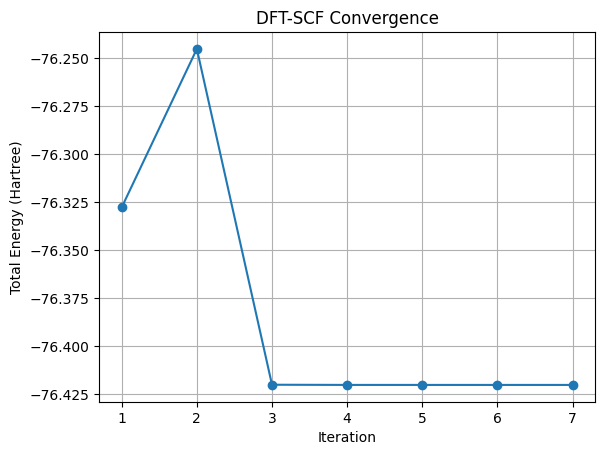

DFT energy for H2O using B3LYP: -76.42034892039445 Hartree


In [2]:
# DFT-SCF (Kohn-Sham)

from pyscf import gto, dft
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define molecule using gto.M() function. Provide atomic positions in angstroms and basis set (here: cc-pvdz)
mol = gto.M(
    atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
''',
    basis = 'cc-pvdz',  # Use a common basis set, good balance between accuracy and computational cost
)

# Step 2: Perform a DFT calculation using the B3LYP functional

# dft.RKS for Restricted Kohn-Sham DFT appropriate for a closed-shell system (like water)
mf = dft.RKS(mol)

# Exchange-correlation functional is set using mf.xc = 'b3lyp' (popular hybrid functional)
mf.xc = 'b3lyp'

# mf.kernel() function performs actual DFT calculation and returns energy
energy = mf.kernel()

# Store convergence data
conv_data = []

# Callback function to collect convergence information
def callback(envs):
    conv_data.append(envs['e_tot'])

# Set the callback directly on the mf object
mf.callback = callback

# Perform DFT calculation
energy = mf.kernel()

# Extract energy values and iteration numbers
energies = conv_data
iterations = range(1, len(energies) + 1)

# Plot convergence
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('DFT-SCF Convergence')
plt.grid(True)
plt.show()

print(f"DFT energy for H2O using B3LYP: {energy} Hartree")

In [3]:
# Kohn-Sham Hamiltonian (First Quantization) includes exchange-correlation potential, which approximates exchange and correlation effects

from pyscf import gto, dft

# Define the molecule
mol = gto.M(
    atom = mol.atom,
    basis = 'cc-pvdz',  # Use a common basis set
)

# Perform a DFT calculation using the B3LYP functional
mf = dft.RKS(mol)
mf.xc = 'b3lyp'
mf.kernel()

# Get the Kohn-Sham Hamiltonian (core Hamiltonian + exchange-correlation potential)
ks_hamiltonian = mf.get_hcore() + mf.get_veff()

print("Kohn-Sham Hamiltonian matrix:\n", ks_hamiltonian)

converged SCF energy = -76.4203489203945
Kohn-Sham Hamiltonian matrix:
 [[-1.91216111e+01  4.06338633e+00 -3.69620322e+00 -7.19654917e-18
  -1.46887710e-16 -1.96943813e-02 -1.56289575e-18 -1.34007389e-17
  -3.88068587e-03  2.91989482e-18  2.26564373e-18 -1.88675866e-04
   6.73009248e-19  1.77075449e-03 -1.01666987e+00 -1.31698194e+00
  -7.45785539e-20  1.67398482e+00  1.29473947e+00 -1.01666987e+00
  -1.31698194e+00 -1.00866836e-18 -1.67398482e+00  1.29473947e+00]
 [ 4.06338633e+00 -1.45464084e+00 -1.11588848e-01 -8.19283592e-17
  -3.33587324e-16 -8.23131467e-02 -2.41138045e-17 -2.26901831e-16
  -6.58682120e-02 -6.43741631e-20  7.15573434e-18 -6.46016129e-03
  -2.95096349e-18  7.05463420e-02 -2.87959546e-01 -2.62222464e-01
   8.22474237e-18 -1.08702411e-02 -1.76931731e-02 -2.87959546e-01
  -2.62222464e-01 -3.20399132e-18  1.08702411e-02 -1.76931731e-02]
 [-3.69620322e+00 -1.11588848e-01 -1.47579592e+00 -1.09042081e-16
  -2.92821323e-16 -1.01216864e-01 -5.29949404e-17 -3.77475828e-16
  

In [6]:
print("Kohn-Sham Hamiltonian Matrix Shape:", ks_hamiltonian.shape)
print("Kohn-Sham Hamiltonian Matrix Size:", ks_hamiltonian.size)
print("Kohn-Sham Hamiltonian Matrix Dimension:", ks_hamiltonian.ndim)
print("Kohn-Sham Hamiltonian Matrix Trace:", np.trace(ks_hamiltonian))
print("Kohn-Sham Hamiltonian Matrix Determinant:", np.linalg.det(ks_hamiltonian))
print("Kohn-Sham Hamiltonian Matrix Rank:", np.linalg.matrix_rank(ks_hamiltonian))

Kohn-Sham Hamiltonian Matrix Shape: (24, 24)
Kohn-Sham Hamiltonian Matrix Size: 576
Kohn-Sham Hamiltonian Matrix Dimension: 2
Kohn-Sham Hamiltonian Matrix Trace: -5.915010709150705
Kohn-Sham Hamiltonian Matrix Determinant: -0.0004599949515138757
Kohn-Sham Hamiltonian Matrix Rank: 24


The **Kohn-Sham Hamiltonian** matrix is central to Density Functional Theory (DFT), which is used for studying the electronic structure of many-body systems, such as atoms, molecules, and solids. The Kohn-Sham formalism transforms the complex many-electron problem into a simpler set of equations that describe non-interacting electrons, but in the **presence of an effective potential that accounts for the effects of electron-electron interactions**.

**Kohn-Sham Hamiltonian operator**

$
\hat{H}_{KS} = -\frac{1}{2} \nabla^2 + V_{ext}(\mathbf{r}) + V_H(\mathbf{r}) + V_{xc}(\mathbf{r})
$

1. $-\frac{1}{2} \nabla^2$ is the **kinetic energy** operator for non-interacting electrons.
2. $V_{ext}(\mathbf{r})$ is the **external potential**, usually the Coulomb potential due to the nuclei.
3. $V_H(\mathbf{r})$ is the **Hartree potential**, representing the electrostatic repulsion between electrons.
4. $V_{xc}(\mathbf{r})$ is the **exchange-correlation potential**, which accounts for the complex many-body interactions of electrons, beyond the simple electrostatic repulsion.

**Kohn-Sham Hamiltonian Matrix**

In practice, we discretize the Kohn-Sham Hamiltonian operator to work with it computationally, leading to the **Kohn-Sham Hamiltonian matrix**. This matrix depends on the basis set used to represent the wavefunctions, such as plane waves, Gaussian functions, or localized orbitals. Kohn-Sham matrix elements are given by:

$
H_{KS,ij} = \langle \phi_i | \hat{H}_{KS} | \phi_j \rangle
$

Where $ \phi_i $ and $ \phi_j $ are basis functions in the chosen representation. The diagonalization of this matrix yields the Kohn-Sham orbitals and their corresponding eigenvalues, which represent the electron energies in the effective potential.

**Key points:**
1. **Kinetic energy** is straightforward for non-interacting electrons.
2. **External potential** $V_{ext}(\mathbf{r})$ is usually the Coulomb interaction with the nuclei.
3. **Hartree potential** accounts for classical electron-electron repulsion.
4. **Exchange-correlation potential** captures the quantum mechanical effects of electron exchange and correlation, typically derived from an exchange-correlation functional.

Solving the Kohn-Sham equations involves iteratively updating the Hamiltonian and the electron density until self-consistency is reached, which then provides the ground state energy and electron density of the system.